# Some initial results on Ising Spin Models

This notebook explores some interesting results of Ising spin models ran on simple 2D non-periodic latices, and on a small-world network generated using rules described in the Barabasi-Alberts model.

In [54]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

import pandas as pd

import analysis.Stats as Stats

stats = Stats.Stats()

allTemperatures = [float(x)/10 for x in range(1, 50)]
numIsingSpins = 100 * 100
numSWSpins = 10000
cols = ['energy', 'sqEnergy', 'mag', 'sqMag']

def normalizeNetwork(x):
    return x / float(10000)

def normalizeIsing(x):
    return x / float(100*100)

def addOne(x):
    return x + 1

ising = pd.read_csv('./data/ising.random.periodic.100.4.2.csv', header=None)
isingNearCritical = pd.read_csv('./data/ising.random.periodic.100.2.4.csv', header=None)
smallWorld = pd.read_csv('./data/small-world.random.10000.4.3.csv', header=None)
periodicCV = pd.read_csv('./data/p.specificheat.csv', header=None)
swCV = pd.read_csv('./data/sw.specificheat.csv', header=None)
ising.columns = cols
isingNearCritical.columns = cols
smallWorld.columns = cols

## The Ising Model away from the critical point

The Ising model using a temperature away from the well known critical temperature of 2. resembles typical data that we've seen. Let's take a small chunk of values and plot them to see what they're like. 

In [55]:
isingSliceEnergy = ising['energy'].map(normalizeIsing)[200000:201000]

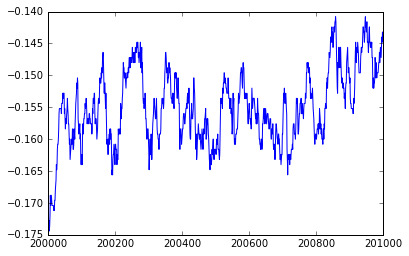

In [56]:
plt.plot(isingSliceEnergy)

Below, we see if there are large jumps using the "log returns" concept used in finance to compute the log change-in-energy for each step. It appears the values are quite near previous values and it suggests some autocorrelation.

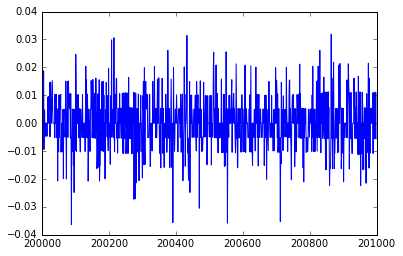

In [57]:
plt.plot(stats.computeLogReturns(isingSliceEnergy[:-1], isingSliceEnergy[1:]))

Let's also take a look at the histogram of energy. We can see it's quite "normal".

(array([  1.45000000e+02,   4.58200000e+03,   2.51770000e+04,
          1.10250000e+05,   2.36570000e+05,   3.25831000e+05,
          2.16705000e+05,   6.84490000e+04,   1.15270000e+04,
          7.64000000e+02]),
 array([-0.1944 , -0.18432, -0.17424, -0.16416, -0.15408, -0.144  ,
        -0.13392, -0.12384, -0.11376, -0.10368, -0.0936 ]),
 <a list of 10 Patch objects>)

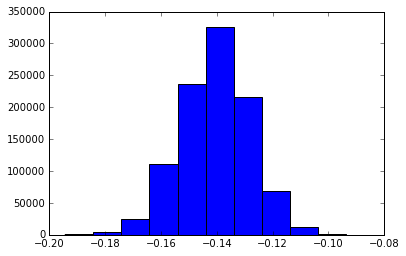

In [58]:
plt.hist(ising['energy'].map(normalizeIsing))

## The Ising model near the critical point

In [59]:
isingNearCriticalSliceEnergy = isingNearCritical['energy'][200000:201000].map(normalizeIsing)
isingNearCriticalSliceMag = isingNearCritical['mag'][300000:301000].map(normalizeIsing).map(addOne)

### Energy per spin

Below is a plot of the computed energy at each step of the simulation, normalized by spin. There appears to be some wild fluctuation events for this very small regime, some hints of "local" phase, along with some frequent jumps an order of magnitude higher than the previous temperature

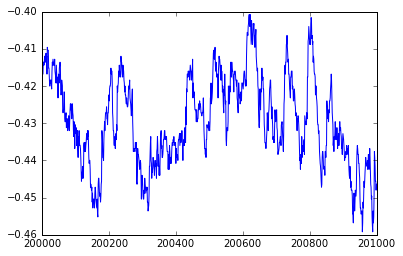

In [60]:
plt.plot(isingNearCriticalSliceEnergy)

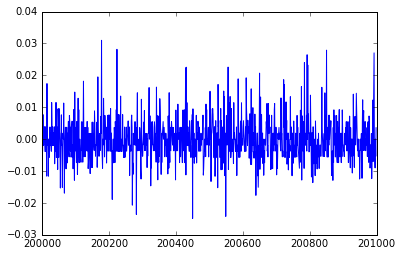

In [61]:
plt.plot(stats.computeLogReturns(isingNearCriticalSliceEnergy[:-1], isingNearCriticalSliceEnergy[1:]))

### Magnetization per spin

This is a plot of the magnetization per spin at each step of the simulation. The magnetization shows some interesting "local" phase properties along with the same large jumps seen in the energy per spin.

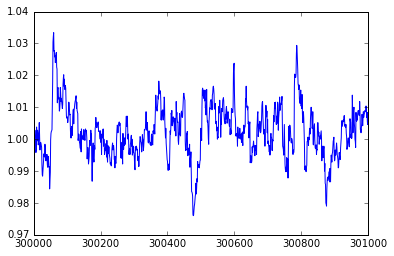

In [62]:
plt.plot(isingNearCriticalSliceMag)

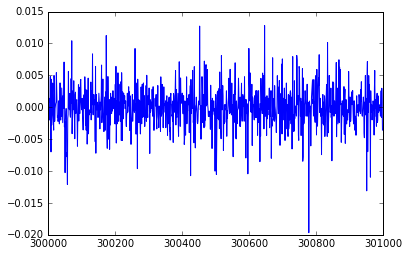

In [63]:
plt.plot(stats.computeLogReturns(isingNearCriticalSliceMag[:-1], isingNearCriticalSliceMag[1:]))

### Specific Heat Capacity

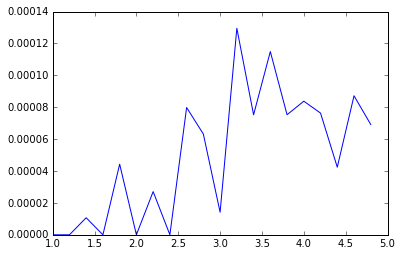

In [64]:
plt.plot(periodicCV[0], periodicCV[1])

## Spin models on a small-world network

In [65]:
smallWorldSlice = smallWorld['energy'][200000:201000].map(normalizeNetwork)

In this section we take a look at spin systems using the same network energy definitions as above, but this time using an underlying network topology of a small-world network. There are wild fluctuations in the network, and some very interesting dynamics that are seen, without being near a critical point.

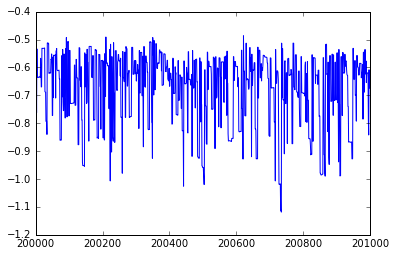

In [66]:
plt.plot(smallWorldSlice)

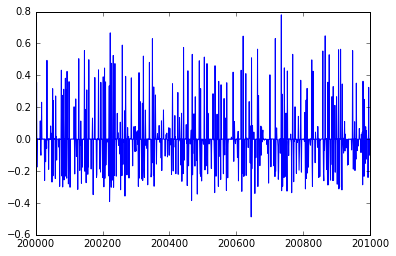

In [67]:
plt.plot(stats.computeLogReturns(smallWorldSlice[:-1], smallWorldSlice[1:]))

(array([  1.70000000e+01,   9.10000000e+01,   1.29100000e+03,
          8.83300000e+03,   3.28090000e+04,   8.04150000e+04,
          1.55302000e+05,   2.70751000e+05,   4.28522000e+05,
          2.19690000e+04]),
 array([-1.4678, -1.361 , -1.2542, -1.1474, -1.0406, -0.9338, -0.827 ,
        -0.7202, -0.6134, -0.5066, -0.3998]),
 <a list of 10 Patch objects>)

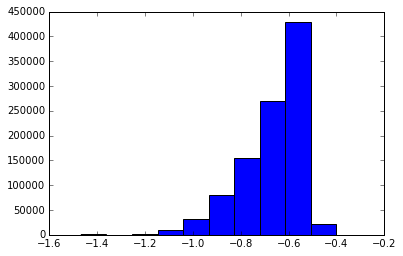

In [68]:
plt.hist(smallWorld['energy'].map(normalizeIsing))

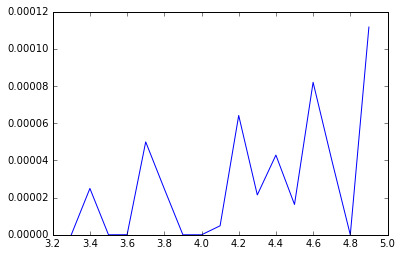

In [69]:
plt.plot(swCV[0], swCV[1])

This section hopes to show that network topology can cause striking differences in system dynamics for simulated ising systems, and hopes to insight further research into the phenomenology of spin systems of varying topologies.